In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import text_classifier
from tflite_model_maker.text_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')

In [2]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

## Read in Data from Text files

In [3]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [4]:
df = pd.concat([df_train,df_val])

In [5]:
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (18005, 2)


In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<AxesSubplot:xlabel='label', ylabel='count'>

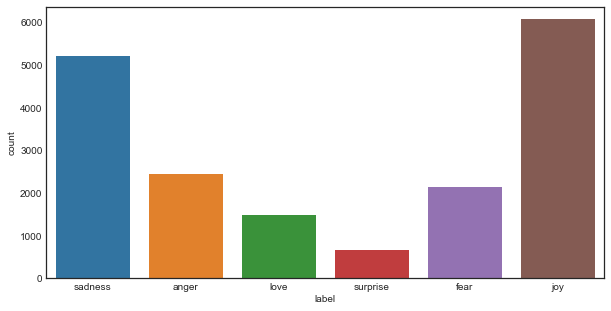

In [8]:
sns.countplot(df.label)

## Change labels to different values

In [9]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [10]:
custom_encoder(df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

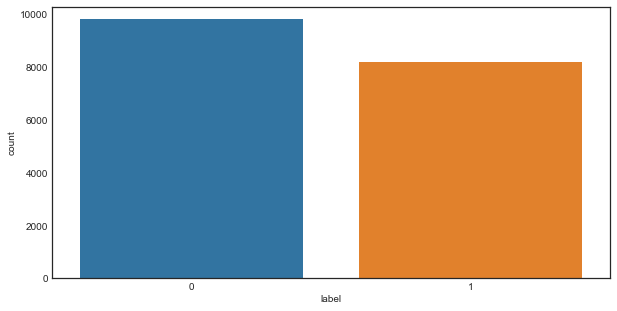

In [11]:
sns.countplot(df.label)

In [12]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [14]:
# Replace labels in dataframes
custom_encoder(df_train['label'])
custom_encoder(df_val['label'])

# Export dataframes to CSV files
df_train.to_csv('train.csv')
df_val.to_csv('val.csv')

## Build Model for Text Analysis

In [15]:
awv_spec = model_spec.get('average_word_vec')

In [16]:
awv_train_data = DataLoader.from_csv(
      filename='train.csv',
      text_column='text',
      label_column='label',
      model_spec=awv_spec,
      is_training=True)
awv_test_data = DataLoader.from_csv(
      filename='val.csv',
      text_column='text',
      label_column='label',
      model_spec=awv_spec,
      is_training=False)

INFO:tensorflow:Saved vocabulary in C:\Users\S00189~1\AppData\Local\Temp\tmpb9r72_au\45ba8767cc8c2ef102d977d67d6b17c5_vocab.


## Train the model with the data

In [17]:
awv_model = text_classifier.create(awv_train_data, model_spec=awv_spec, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


500/500 [==============================] - 4s 5ms/step - loss: 0.6884 - accuracy: 0.5471
Epoch 2/2
500/500 [==============================] - 2s 5ms/step - loss: 0.6839 - accuracy: 0.5482
Epoch 3/3
500/500 [==============================] - 2s 5ms/step - loss: 0.6607 - accuracy: 0.6090
Epoch 4/4
500/500 [==============================] - 2s 5ms/step - loss: 0.5998 - accuracy: 0.7207
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 0.5075 - accuracy: 0.8074
Epoch 6/6
500/500 [==============================] - 2s 5ms/step - loss: 0.4007 - accuracy: 0.8661
Epoch 7/7
500/500 [==============================] - 2s 5ms/step - loss: 0.3052 - accuracy: 0.9054
Epoch 8/8
500/500 [==============================] - 2s 5ms/step - loss: 0.2354 - accuracy: 0.9288
Epoch 9/9
500/500 [==============================] - 2s 5ms/step - loss: 0.1859 - accuracy: 0.9435
Epoch 10/10
500/500 [==============================] - 2s 5ms/step - loss: 0.1588 - accuracy: 0.9509


In [18]:
awv_model.evaluate(awv_test_data)

63/63 [==============================] - 1s 4ms/step - loss: 0.1676 - accuracy: 0.9400


[0.16764268279075623, 0.9399999976158142]

In [19]:
awv_model.export(export_dir='average_word_vec/')

INFO:tensorflow:Assets written to: C:\Users\S00189~1\AppData\Local\Temp\tmpqx7x01su\assets


INFO:tensorflow:Assets written to: C:\Users\S00189~1\AppData\Local\Temp\tmpqx7x01su\assets


INFO:tensorflow:Vocab file and label file are inside the TFLite model with metadata.


INFO:tensorflow:Vocab file and label file are inside the TFLite model with metadata.


INFO:tensorflow:Saved vocabulary in C:\Users\S00189~1\AppData\Local\Temp\tmphf8b1588\vocab.txt.


INFO:tensorflow:Saved vocabulary in C:\Users\S00189~1\AppData\Local\Temp\tmphf8b1588\vocab.txt.


INFO:tensorflow:Saving labels in C:\Users\S00189~1\AppData\Local\Temp\tmphf8b1588\labels.txt


INFO:tensorflow:Saving labels in C:\Users\S00189~1\AppData\Local\Temp\tmphf8b1588\labels.txt


INFO:tensorflow:Finished populating metadata and associated file to the model:


INFO:tensorflow:Finished populating metadata and associated file to the model:


INFO:tensorflow:average_word_vec\model.tflite


INFO:tensorflow:average_word_vec\model.tflite


INFO:tensorflow:The associated file that has been been packed to the model is:


INFO:tensorflow:The associated file that has been been packed to the model is:


INFO:tensorflow:['labels.txt', 'vocab.txt']


INFO:tensorflow:['labels.txt', 'vocab.txt']


INFO:tensorflow:TensorFlow Lite model exported successfully: average_word_vec/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: average_word_vec/model.tflite


## Export file to add to Firebase

In [20]:
from IPython.display import FileLink
FileLink('model.tflite')

C:\Users\S00189764\Downloads\model.tflite